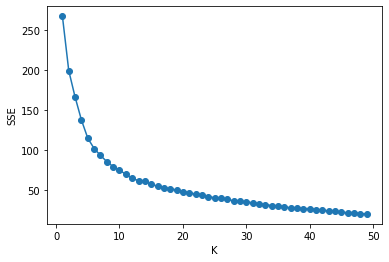

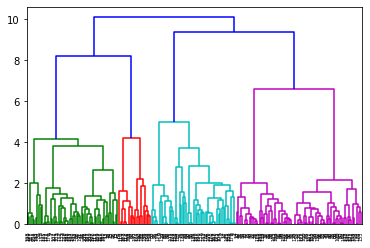

      0
0    32
1    32
2    22
3     9
4    29
..   ..
200  13
201   6
202  13
203  15
204   6

[205 rows x 1 columns]
volkswagen 1131 deluxe sedan的竞品如下:
['audi fox', 'renault 5 gtl', 'saab 99e']
volkswagen model 111的竞品如下:
['mazda glc deluxe', 'mazda rx-7 gs', 'toyota corona', 'toyota corolla']
volkswagen type 3的竞品如下:
['audi 100 ls', 'saab 99le', 'saab 99gle']
volkswagen 411 (sw)的竞品如下:
['audi 100 ls', 'saab 99le', 'saab 99gle']
volkswagen super beetle的竞品如下:
['toyota celica gt']
volkswagen dasher的竞品如下:
['audi 100 ls', 'saab 99le', 'saab 99gle']
vw dasher的竞品如下:
['audi fox', 'renault 5 gtl', 'saab 99e']
vw rabbit的竞品如下:
['audi fox', 'renault 5 gtl', 'saab 99e']
volkswagen rabbit的竞品如下:
['audi 100ls', 'audi 100ls', 'audi 5000', 'honda civic', 'mitsubishi mirage g4', 'renault 12tl']
volkswagen rabbit custom的竞品如下:
['toyota celica gt']
volkswagen dasher的竞品如下:
['audi 100ls', 'audi 100ls', 'audi 5000', 'honda civic', 'mitsubishi mirage g4', 'renault 12tl']


In [3]:
# -*- coding: utf-8 -*-
# Project C：汽车产品聚类分析
# WangChuanyi Employee ID: 68290

from sklearn.cluster import KMeans
from sklearn import preprocessing

import pandas as pd
import numpy as np

# 数据加载
data = pd.read_csv('CarPrice_Assignment.csv',encoding='gbk')
# print(data)

train_x_initial = data[["symboling","fueltype","aspiration","doornumber",
                "carbody","drivewheel","enginelocation","wheelbase",
                "carlength","carwidth","carheight","curbweight",
                "enginetype","cylindernumber","enginesize","fuelsystem",
                "boreratio","stroke","compressionratio","horsepower"
                ,"peakrpm","citympg","highwaympg","price"]]

train_x = pd.DataFrame(train_x_initial)

# LabelEncoder 将Categorical类数据转换为数值
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Categorical_data = ["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
for item in Categorical_data:
    # print(item)
    train_x[item] = le.fit_transform(train_x[item])
# print(train_x)

# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv', index=False)
# print(train_x)

# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1, 50):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 50)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

# 使用层次聚类
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
model = AgglomerativeClustering(linkage='ward', n_clusters=25)
y = model.fit_predict(train_x)
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.savefig("CarPrice_Assignment_cluster_result.png", dpi=750, bbox_inches = 'tight')
plt.show()

# 使用KMeans聚类，根据手肘法，选取50组分类较为合适
kmeans = KMeans(n_clusters=50)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
predict_y = pd.DataFrame(predict_y)
print(predict_y)
# 合并聚类结果，插入到原数据中
result = pd.concat([data, predict_y],axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)


# 将vokswagen汽车的相应竞品找出
for i in range(len(result)):
    # 如果CarName包含'volkswagen'，则识别为大众汽车产品
    if 'volkswagen' in result.iloc[i]['CarName']:
        kmeans_index = result.iloc[i]['聚类结果']
        comp = []
        for j in range(len(result)):
            # 取聚类结果与大众汽车产品相同的非大众汽车产品集合
            if result.iloc[j]['聚类结果'] == kmeans_index:
                if 'volkswagen' in result.iloc[j]['CarName']:
                    continue
                if 'vw' in result.iloc[j]['CarName']:
                    continue
                else:
                    comp.append(str(result.iloc[j]['CarName']))
            else:
                continue
        print(result.iloc[i]['CarName']+'的竞品如下:')
        print(comp)
    # 如果CarName包含'vw'，则识别为大众汽车产品
    elif 'vw' in result.iloc[i]['CarName']:
        kmeans_index = result.iloc[i]['聚类结果']
        comp = []
        for j in range(len(result)):
            # 取聚类结果与大众汽车产品相同的非大众汽车产品集合
            if result.iloc[j]['聚类结果'] == kmeans_index:
                if 'volkswagen' in result.iloc[j]['CarName']:
                    continue
                if 'vw' in result.iloc[j]['CarName']:
                    continue
                else:
                    comp.append(str(result.iloc[j]['CarName']))
            else:
                continue
        print(result.iloc[i]['CarName']+'的竞品如下:')
        print(comp)
    else:
        continue

# 将结果导出到CSV文件中
result.to_csv("CarPrice_Assignment_cluster_result.csv",index=False)
